In [2]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1)#此版本的mnist与书上不同，标签集的元素都是string类型
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',


In [6]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [4]:
X=mnist['data']
X.shape

(70000, 784)

In [5]:
y=mnist['target']
y.shape

(70000,)

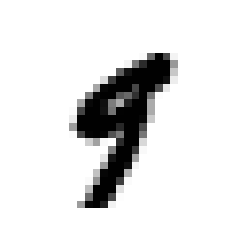

In [8]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

In [10]:
y[36000]

'9'

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]


In [21]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')
y_train_5

array([False, False, False, ..., False, False, False])

In [23]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter = 1000, random_state = 42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [25]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.95435, 0.9684 , 0.9596 ])

In [30]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

print(list(skfolds.split(X_train, y_train_5)))

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

[(array([19926, 19927, 19928, ..., 59997, 59998, 59999]), array([    0,     1,     2, ..., 20648, 20655, 20664])), (array([    0,     1,     2, ..., 59997, 59998, 59999]), array([19926, 19927, 19928, ..., 40268, 40272, 40279])), (array([    0,     1,     2, ..., 40268, 40272, 40279]), array([39967, 39968, 39969, ..., 59997, 59998, 59999]))]


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [31]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [32]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53215,  1364],
       [  989,  4432]], dtype=int64)

In [34]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

y_scores.shape

(60000,)

In [40]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
print(precisions,'\n',recalls,'\n',thresholds)

[0.09069919 0.09068398 0.0906855  ... 1.         1.         1.        ] 
 [1.00000000e+00 9.99815532e-01 9.99815532e-01 ... 3.68935621e-04
 1.84467810e-04 0.00000000e+00] 
 [-71510.76583351 -71468.13043365 -71433.08605128 ...  32581.66924933
  33332.88723833  35795.64374924]


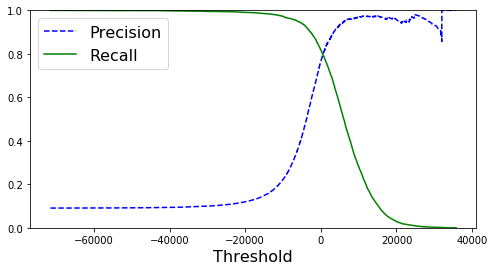

In [47]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,
             precisions[:-1],#为什么要[:-1]?
            "b--",
            label="Precision")
    
    plt.plot(thresholds,
             recalls[:-1],#为什么要[:-1]?
            "g-",
            label="Recall")
    plt.xlabel("Threshold",fontsize=16)
    plt.legend(loc="upper left",fontsize=16)
    plt.ylim([0,1])
    
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
#plt.xlim([-100000, 100000])

plt.show()

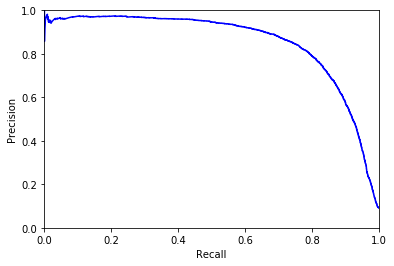

In [48]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, 
             precisions, 
             "b-")
    
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.axis([0, 1, 0, 1])

#plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [49]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds = roc_curve(y_train_5,y_scores)

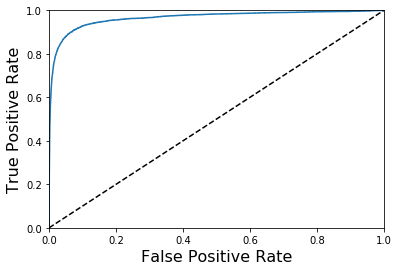

In [54]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plot_roc_curve(fpr, tpr)
plt.show()

In [55]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5527,    1,   33,   29,    6,  111,   51,    5,  146,   14],
       [   2, 6295,   60,  117,   10,   32,   16,   14,  182,   14],
       [  21,   28, 5151,  257,   52,   57,  109,   56,  215,   12],
       [  11,   11,  172, 5296,   10,  291,   23,   48,  197,   72],
       [  10,   15,   85,   44, 5101,   53,   61,   28,  184,  261],
       [  34,   13,   49,  386,   49, 4161,  157,   15,  454,  103],
       [  27,    4,   67,    7,   29,  179, 5526,    4,   73,    2],
       [  17,   13,  112,  110,   70,   19,    5, 5590,  107,  222],
       [  20,   53,   74,  346,   25,  203,   77,   17, 4945,   91],
       [  21,   14,   51,  165,  221,   82,    3,  247,  309, 4836]],
      dtype=int64)

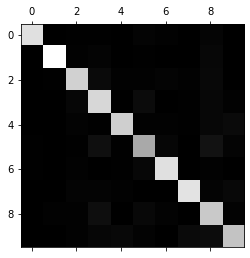

In [61]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [57]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

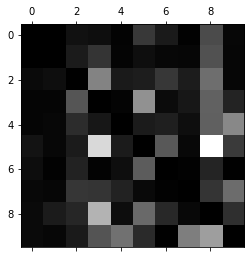

In [62]:
np.fill_diagonal(norm_conf_mx, 0)

plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

plt.show()

In [12]:
from sklearn.neighbors import KNeighborsClassifier

#y_train_large = (y_train >= '7')
#y_train_odd = (y_train % 2 == 1) 如何判断字符串数字组成的数组中每个“数字”的奇偶性？？？
#y_multilabel = np.c_[y_train_large, y_train_odd]
y_train_dayu4 = (y_train >= '4')
y_train_xiaoyu7 = (y_train <= '7')
y_multilabel = np.c_[y_train_dayu4, y_train_xiaoyu7]

y_multilabel

array([[ True, False],
       [ True,  True],
       [False,  True],
       ...,
       [False,  True],
       [False,  True],
       [ True,  True]])

In [14]:
np.shape(y_multilabel)

(60000, 2)